In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df.head(2)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,y
1,1028,0.18,0.372,0.43,0.43,0.21,y


In [41]:
df.columns

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make', 'yesno'], dtype='object')

In [4]:
df.size, df.shape

(32207, (4601, 7))

# Data Exploration

In [5]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

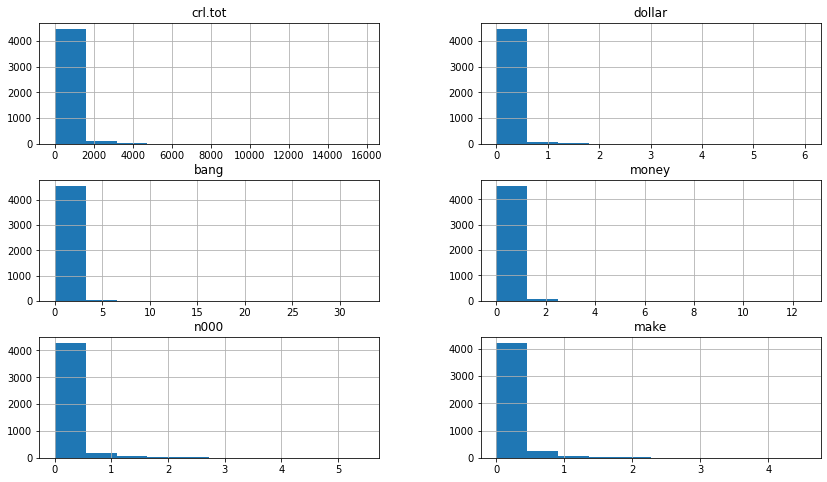

In [8]:
df.hist(figsize=(14, 8))

# Outlier removal

In [20]:
df = df[df['crl.tot'] <= 750]
df.shape

(4168, 7)

In [30]:
df = df[df['dollar'] <= 2]
df = df[df['money'] <= 2]
df = df[df['bang'] <= 2]
df.shape

(4084, 7)

array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

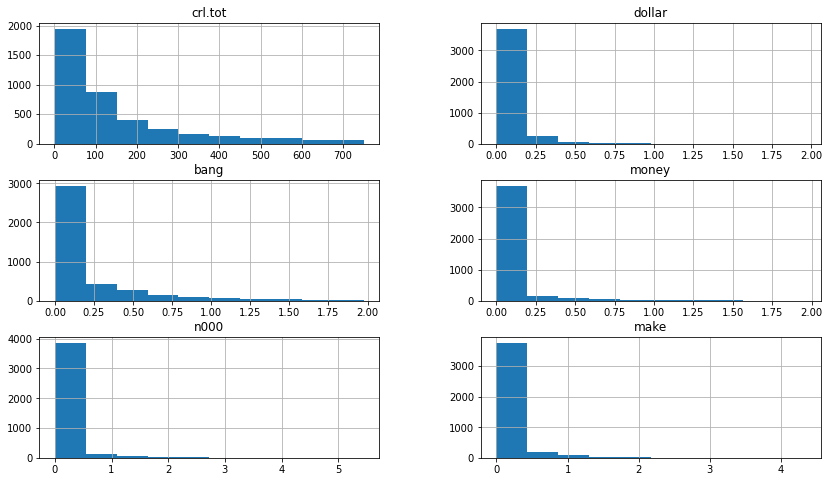

In [32]:
df.hist(figsize=(14,8))

# Correlation matrix

<Axes: >

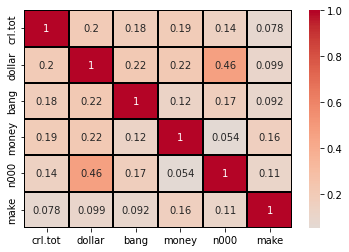

In [42]:
sns.heatmap(df[['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']].corr(),
           cmap='coolwarm',
           center=0,
           linewidths=2,
           linecolor='black',
           annot=True,
           fmt='0.2g')

# Logistic Regression

In [43]:
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.0,0.0,0.0,1
3,191,0.000,0.137,0.0,0.0,0.0,1
4,191,0.000,0.135,0.0,0.0,0.0,1
5,54,0.000,0.000,0.0,0.0,0.0,1
6,112,0.054,0.164,0.0,0.0,0.0,1


In [52]:
X = df.iloc[:,:-1]
y = df['yesno']
X = sm.add_constant(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [54]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.391725
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3267
Model:                          Logit   Df Residuals:                     3260
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.3949
Time:                        18:43:59   Log-Likelihood:                -1279.8
converged:                       True   LL-Null:                       -2114.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3367      0.082    -28.343      0.000      -2.498      -2.175
crl.tot        0.0027      0.

# Predictions

In [56]:
predictions = model.predict(X_test)
predictions.head()

1715    0.562150
1271    0.999913
1211    0.997493
184     0.151329
3233    0.331812
dtype: float64

In [60]:
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 1, 1, 0, 0])

In [61]:
# check the balance of the data
predictions.mean()

0.2533659730722154

Not very balanced predictions

# Confustion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[506  28]
 [104 179]]


In [64]:
(tn, fp, fn, tp)

(506, 28, 104, 179)

In [69]:
accuracy = (tp + tn)/(tn+fp+fn+tp)
f1_score = 2 * tp / (2 * tp + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Accuracy:", accuracy)
print("f1 score:", f1_score)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Accuracy: 0.8384332925336597
f1 score: 0.7306122448979592
Specificity: 0.947565543071161
Sensitivity: 0.6325088339222615


# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(clas)